<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">การวิเคราะห์ข้อมูลถดถอยเชิงเส้นอย่างง่าย (Simple Linear Regression)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">การวิเคราะห์ข้อมูลถดถอยเชิงเส้นอย่างง่ายคืออะไร</h1>

การวิเคราะห์ข้อมูลถดกอยเชิงเส้นอย่างง่าย คือ การวิเคราะห์ความสัมพันธ์เชิงเส้นระหว่างตัวแปรต้น (แทนด้วย x) และตัวแปรตาม (แทนด้วย y) โดยมีตัวแปรต้นเพียง 1 ตัว

ซึ่งมีความสัมพันธ์เชิงเส้นต่อกัน โดยจุดมุ่งหมายของการวิเคราะห์ข้อมูลคือการสร้างสมการเส้นตรงที่สามารถอธิบายความสัมพันธ์ของทั้งสองตัวแปรได้ดีที่สุด 

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">ที่มาของคำว่า "สมการถดถอย" หรือ "Regression"</h1>

มีที่มาจากนักวิทยาศาสตร์ที่สนใจด้านพันธุศาสตร์ ชื่อ Francis Galton ในช่วงปี 1885 เขาได้ทำการทดลองเพื่อหาความสัมพันธ์ระหว่าง ความสูงของแม่กับลูกสาว และ ความสูงของพ่อกับลูกชาย

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*9rp02Cu2ziTpof-KnaHJvA.jpeg" alt="Regression" width="700" height="500"/>
    <br>
    <span style="font-size: small;">ที่มา: The Art of Statistics หน้า 142</span>
</div>

กราฟด้านบนแสดงข้อมูลชุดหนึ่งที่ได้จากการทดลองนี้ เป็นความสัมพันธ์ระหว่างความสูงของลูกชาย 465 คน กับพ่อจำนวน 197 คน 

ซึ่งพบว่าความสูงของลูกชายจะมีแนวโน้ม "ถดถอย" เข้าหาค่าเฉลี่ยความสูงของคนรุ่นพ่อ ดังนั้น คำว่า "ถดถอย" จึงถูกนำมาใช้ในชื่อสมการนี้เพื่อแสดงถึงแนวโน้มของข้อมูลในการกลับเข้าหาค่าเฉลี่ย

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [33]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">โจทย์ปัญหา:</h1>

สมมติว่าเราต้องการโมเดลที่สามารถทำนายราคาบ้านจากขนาดของบ้าน โดยมีข้อมูลที่กำหนดให้เพียง 2 ข้อมูล ดังนี้:

- บ้านที่มีขนาด 1000 ตารางฟุตจะขายในราคา 300,000$
- บ้านที่มีขนาด 2000 ตารางฟุตจะขายในราคา 500,000$

ดังนั้นเราจึงสามารถสร้างตารางออกมาในรูปแบบดังนี้:

<div align="center">
    <table>
        <tr>
            <th>ขนาด (1000 ตารางฟุต)</th>
            <th>ราคา (พันดอลลาร์)</th>
        </tr>
        <tr>
            <td>1</td>
            <td>300</td>
        </tr>
        <tr>
            <td>2</td>
            <td>500</td>
        </tr>
    </table>
</div>


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>


<h1 style="font-size: 18px;">1.1 สร้างตัวแปรเก็บข้อมูล</h1>


In [34]:
# สร้างตัวแปรที่ชื่อว่า X_train เพื่อเก็บข้อมูลขนาดของบ้าน
X_train = np.array([1.0, 2.0])       # หน่วยเป็น 1000 ตารางฟุต
# สร้างตัวแปรที่ชื่อว่า y_train เพื่อเก็บข้อมูลราคาของบ้าน
y_train = np.array([300.0, 500.0])   # หน่วยเป็น 1000 ดอลลาร์

<h1 style="font-size: 18px;">1.2 แสดงกราฟความสัมพันธ์ของข้อมูล</h1>

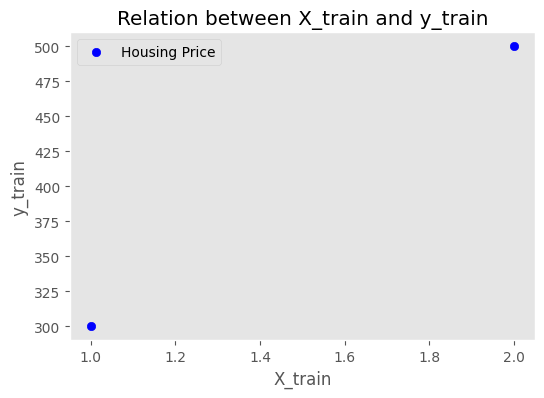

In [35]:
plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue', label='Housing Price')
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()           # สั่งให้แสดงชื่อจุด
plt.grid()             # แสดงเส้น grid บนกราฟ
plt.show()             # แสดงกราฟ

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. หลักการทำงานของโมเดล Simple Linear Regression</h1>

<h1 style=" font-size: 18px;">สมการ Simple Linear Regression:</h1>


<div style="font-size: 24px;">

$$Y \approx w \cdot X + b$$

</div>

โดยที่:
- $Y$ คือตัวแปรตาม (Dependent Variable) ซึ่งเป็นผลลัพธ์หรือค่าที่เราต้องการทำนายหรือวัด
- $X$ คือตัวแปรอิสระ (Independent Variable) ซึ่งเป็นข้อมูลหรือตัวแปรที่มีผลต่อ $Y$ และที่เราใช้ในการทำนายหรือวัด $Y$
- $w$ หรืออาจเรียกว่า weight คือพารามิเตอร์หรือความชัน (Coefficient) ซึ่งแสดงถึงความสัมพันธ์ระหว่าง $X$ และ $Y$ และบ่งบอกว่าการเปลี่ยนแปลงใน $X$ มีผลต่อ $Y$ อย่างไร
- $b$ หรืออาจเรียกว่า bias คือค่าคงที่ (Intercept) ซึ่งคือค่าของ $Y$ เมื่อ $X$ มีค่าเป็นศูนย์ หรือค่าตัดแกน $Y$ ที่ $X$ เท่ากับศูนย์

<h1 style="font-size: 18px;">2.1 สร้างเส้นตรงสมมติ</h1>

In [36]:
# สร้างตัวแปรเก็บ weight และ bias ของสมการ linear regression
w = 250 ; b = 20
# สร้างสมการ linear Regression เก็บไว้ที่ตัวแปร y_pred
y_pred = w * X_train + b
# แสดงค่า y_pred 
y_pred

array([270., 520.])

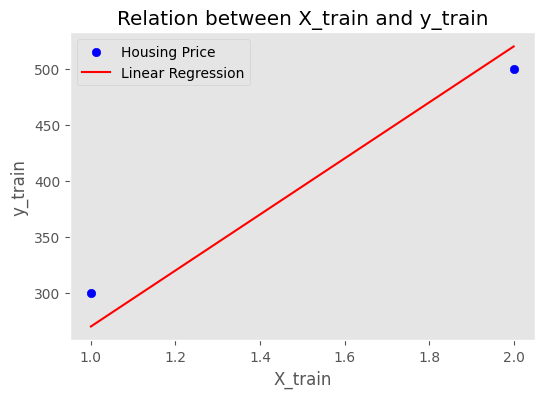

In [37]:
plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.plot(X_train, y_pred, color='red', label='Linear Regression')  # พล็อตสมการ linear Regression
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()           # สั่งให้แสดงชื่อจุด
plt.grid()             # แสดงเส้น grid บนกราฟ
plt.show()             # แสดงกราฟ

<h1 style="font-size: 18px;">2.2 คำนวณค่า Cost ที่เกิดขึ้น</h1>

<h1 style="font-size: 18px;">ในที่นี้จะใช้ Mean Square Error (MSE) เป็นค่า Cost ที่ใช้วัดความแม่นยำของ Simple Linear Regression Model นี้</h1>
<h1 style="font-size: 18px;">Mean Square Error (MSE) สามารถคำนวณได้ดังนี้:</h1>

<div style="font-size: 24px;">

$$ J(w,b) = MSE = \frac{1}{2m} \sum_{i=0}^{m-1} (\hat{y}_i - y_i)^2 $$

</div>

โดยที่:

- $J(w,b)$ คือค่า Cost โดยในที่นี้เราใช้เป็น $MSE$
- $m$ คือจำนวนข้อมูล
- $y_i$ คือค่าจริง (actual) สำหรับข้อมูลลำดับที่ $i$
- $\hat{y}_i$ คือค่าที่ทำนาย (predict) สำหรับข้อมูลลำดับที่ $i$

In [38]:
# กำหนดจำนวนข้อมูล เก็บไว้ในตัวแปร m
m = 2
# คำนวณค่า MSE
mse = (1/(2*m)) * ((y_train - y_pred) ** 2).sum()
# แสดงค่า MSE
mse

325.0

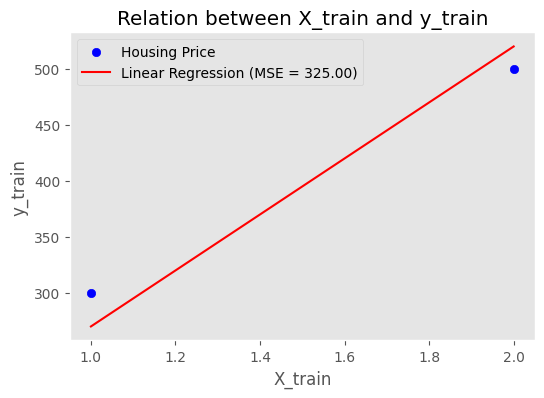

In [39]:
plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.plot(X_train, y_pred, color='red', label=f'Linear Regression (MSE = {mse:.2f})')  # พล็อตสมการ linear Regression พร้อม ค่า MSE
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()  # สั่งให้แสดงชื่อจุด
plt.grid()  # แสดงเส้น grid บนกราฟ
plt.show()  # แสดงกราฟ

<h1 style="font-size: 18px;">2.3 ทำ Gradient Descent จากค่า Cost ที่หาได้จากสมการนี้</h1>

<div style="font-size: 24px;">

$$ J(w,b) = MSE = \frac{1}{2m} \sum_{i=0}^{m-1} (\hat{y}_i - y_i)^2 $$

</div>

การทำ Gradient Descent คือการที่เราต้องการปรับปรุงค่า $w$ และ $b$ ให้เหมาะสมกับชุดข้อมูลมากที่สุด สามารถทำได้ด้วยการหา gradient ของฟังก์ขัน Cost $J(w,b)$ (ในที่นี้เราใช้ MSE) เทียบกับ $w$ และ $b$ จากนั้นก็อัพเดท $w$ และ $b$ ใหม่ หรือก็คือเราจะ ทำซ้ำจนกว่าจะลู่เข้า:

<div style="font-size: 24px;">

$$
\begin{align*}
w &:= w - \alpha \frac{\partial J(w,b)}{\partial w} \\
b &:= b - \alpha \frac{\partial J(w,b)}{\partial b}
\end{align*}
$$

</div>

โดยที่:
- $w$ คือ พารามิเตอร์ weight
- $b$ คือ พารามิเตอร์ bias 
- $\alpha$ คือ อัตราการเรียนรู้ (learning rate) ที่ควบคุมขนาดของการอัพเดทในแต่ละรอบการทำงาน
- $\frac{\partial J(w,b)}{\partial w}$ และ $\frac{\partial J(w,b)}{\partial b}$ คือ gradient ของฟังก์ชัน Cost เทียบกับ $w$ และ $b$ ตามลำดับ ซึ่งสามารถคำนวณได้ดังนี้:

<div style="font-size: 24px;">

$$
\frac{\partial J(w, b)}{\partial w} = \frac{\partial}{\partial w} \left( \frac{1}{2m} \sum_{i=0}^{m-1} (w x^{(i)} + b - y^{(i)})^2 \right)
$$

$$
\frac{\partial}{\partial w} (w x^{(i)} + b - y^{(i)})^2 = 2 (w x^{(i)} + b - y^{(i)}) \cdot \frac{\partial}{\partial w} (w x^{(i)} + b - y^{(i)})
$$

$$
\textcolor{yellow}{
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (\hat{y}^{(i)} - y^{(i)})x^{(i)}}
$$

</div>

-----------------------------------------------------------------------------------------------------

<div style="font-size: 24px;">

$$
\frac{\partial J(w, b)}{\partial b} = \frac{\partial}{\partial b} \left( \frac{1}{2m} \sum_{i=0}^{m-1} (w x^{(i)} + b - y^{(i)})^2 \right)
$$

$$
\frac{\partial}{\partial b} (w x^{(i)} + b - y^{(i)})^2 = 2 (w x^{(i)} + b - y^{(i)}) \cdot \frac{\partial}{\partial b} (w x^{(i)} + b - y^{(i)})
$$

$$
\textcolor{yellow}{
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (\hat{y}^{(i)} - y^{(i)})}
$$

</div>

In [40]:
alpha = 0.05            # กำหนดค่า learning rate เก็บไว้ในตัวแปร alpha
num_iterations = 10000    # กำหนดจำนวนครั้งในการทำ Gradient Descent เก็บไว้ในตัวแปร num_iterations
m = len(X_train)        # กำหนดจำนวนข้อมูล เก็บไว้ในตัวแปร m
w = 250                 # กำหนดค่าเริ่มต้นของ weights
b = 20                  # กำหนดค่าเริ่มต้นของ bias

# ดำเนินการทำ Gradient Descent
for iteration in range(num_iterations):
    # คำนวณ y_pred จาก w และ b
    y_pred = w * X_train + b
    
    # คำนวณ gradients
    dw = (1/m) * np.sum((y_pred - y_train) * X_train)
    db = (1/m) * np.sum(y_pred - y_train)
    
    # อัพเดทค่า w และ b
    w = w - alpha * dw
    b = b - alpha * db

    # คำนวณค่า Cost ใหม่
    mse = (1 / (2 * m)) * ((y_train - y_pred) ** 2).sum()
    print(f'Iteration {iteration+1}/{num_iterations}: MSE = {mse:.2f}, w = {w:.2f}, b = {b:.2f}')

print('Final w:', w)
print('Final b:', b)

Iteration 1/10000: MSE = 325.00, w = 249.75, b = 20.25
Iteration 2/10000: MSE = 322.52, w = 249.51, b = 20.51
Iteration 3/10000: MSE = 320.09, w = 249.29, b = 20.77
Iteration 4/10000: MSE = 317.70, w = 249.07, b = 21.03
Iteration 5/10000: MSE = 315.35, w = 248.86, b = 21.30
Iteration 6/10000: MSE = 313.03, w = 248.65, b = 21.57
Iteration 7/10000: MSE = 310.73, w = 248.45, b = 21.84
Iteration 8/10000: MSE = 308.45, w = 248.26, b = 22.12
Iteration 9/10000: MSE = 306.20, w = 248.07, b = 22.39
Iteration 10/10000: MSE = 303.96, w = 247.88, b = 22.67
Iteration 11/10000: MSE = 301.75, w = 247.69, b = 22.94
Iteration 12/10000: MSE = 299.55, w = 247.51, b = 23.22
Iteration 13/10000: MSE = 297.36, w = 247.33, b = 23.50
Iteration 14/10000: MSE = 295.20, w = 247.15, b = 23.77
Iteration 15/10000: MSE = 293.05, w = 246.98, b = 24.05
Iteration 16/10000: MSE = 290.91, w = 246.80, b = 24.32
Iteration 17/10000: MSE = 288.79, w = 246.63, b = 24.59
Iteration 18/10000: MSE = 286.69, w = 246.45, b = 24.87
I

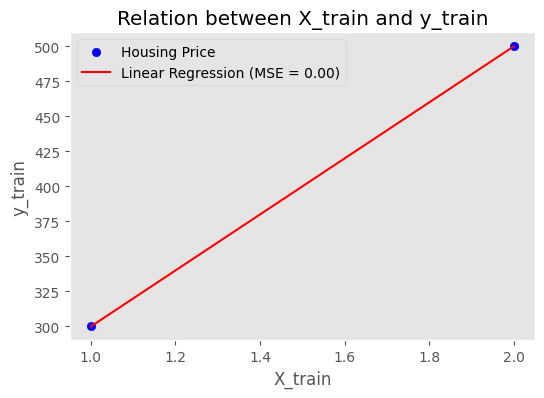

In [41]:
# สร้างสมการ linear Regression เก็บไว้ที่ตัวแปร y_pred
y_pred = w * X_train + b

plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.plot(X_train, y_pred, color='red', label=f'Linear Regression (MSE = {mse:.2f})')  # พล็อตสมการ linear Regression พร้อม ค่า MSE
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()           # สั่งให้แสดงชื่อจุด
plt.grid()             # แสดงเส้น grid บนกราฟ
plt.show()             # แสดงกราฟ

<h1 style="font-size: 18px;">2.4 การทำนายข้อมูลชุดใหม่ (Unseen Data)</h1>

In [42]:
X_test = np.array([4.0, 5.0, 9.0]) # สมมติเรามีข้อมูลขนาดของบ้านเข้ามาใหม่ โดยที่ไม่เคยมีในชุดข้อมูลก่อน
# ทำนายราคาของบ้านจากข้อมูล X_unseen ด้วยโมเดลที่เราเทรนมาแล้ว
y_pred = w * X_test + b
# แสดงผลค่าที่โมเดลทำนาย
y_pred

array([ 900., 1100., 1900.])

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">Quiz: จงพิจารณาข้อมูลต่อไปนี้</h1>

<div align="center">
    <table>
        <tr>
            <th>X</th>
            <th>Y</th>
        </tr>
        <tr>
            <td>1</td>
            <td>300</td>
        </tr>
        <tr>
            <td>2</td>
            <td>500</td>
        </tr>
        <tr>
            <td>3</td>
            <td>750</td>
        </tr>
        <tr>
            <td>4</td>
            <td>1000</td>
        </tr>
        <tr>
            <td>5</td>
            <td>1300</td>
        </tr>
        <tr>
            <td>6</td>
            <td>1500</td>
        </tr>
    </table>
</div>

<h1 style="font-size: 18px;">1. จงสร้างกราฟแสดงความสัมพันธ์ของข้อมูล X และ Y</h1>

<h1 style="font-size: 18px;">2. จากข้อที่ 1 จงคำนวณหาสมการถดถอยเชิงเส้นที่ดีที่สุดในการอธิบายความสัมพันธ์ของทั้งสองตัวแปรนี้</h1>

<h1 style="font-size: 18px;">3. หากมีข้อมูลใหม่คือ X = 10 จงใช้สมการถดถอยจากข้อที่ 2 ประมาณค่า Y ที่เกิดขึ้นว่าควรเป็นเท่าใด</h1>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. การใช้ Simple Linear Regression ด้วย Scikit-Learn Library</h1>


In [43]:
# นำเข้าไลบรารี sklearn.linear_model เพื่อเรียกใช้ Linear Regression Model
from sklearn.linear_model import LinearRegression 

# นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ mean_squared_error
from sklearn.metrics import mean_squared_error

<h1 style="font-size: 18px;">3.1 สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

In [44]:
# สร้างตัวแปรที่ชื่อว่า X_train เพื่อเก็บข้อมูลขนาดของบ้าน
X_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])                            # หน่วยเป็น 1000 ตารางฟุต
# สร้างตัวแปรที่ชื่อว่า y_train เพื่อเก็บข้อมูลราคาของบ้าน
y_train = np.array([350.0, 570.0, 780.0, 910.0, 1050.0, 1280.0, 1720.0, 1980.0, 2180.0, 2310.0])   # หน่วยเป็น 1000 ดอลลาร์

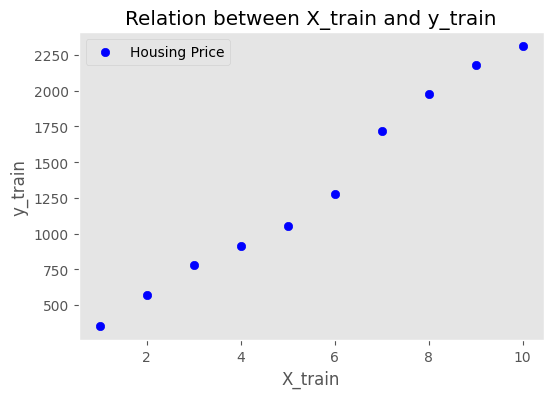

In [45]:
plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()           # สั่งให้แสดงชื่อจุด
plt.grid()             # แสดงเส้น grid บนกราฟ
plt.show()             # แสดงกราฟ

<h1 style="font-size: 18px;">3.2 สร้างโมเดลและเทรนโมเดล</h1>

In [46]:
X_train

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [47]:
X_train.reshape(-1,1)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [48]:
model = LinearRegression() # สร้างโมเดล Linear Regression โดยเก็บไว้ที่ตัวแปร model
X_train = X_train.reshape(-1, 1) # เปลี่ยน shape ของ X_train จาก 1D เป็น 2D array (เป็นข้อบังคับของ Scikit-Learn)
X_train # แสดงผล X_train

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [49]:
model.fit(X_train, y_train) # เทรนโมเดล หรือ ให้โมเดลเรียนรู้ชุดข้อมูลที่เราป้อนให้ นั่นคือ X_train และ y_train

LinearRegression()

In [50]:
y_pred = model.predict(X_train) # ให้โมเดลทำนายราคาบ้าน จากขนาดของบ้าน เก็บไว้ในตัวแปรชื่อ y_pred
y_pred

array([ 288.36363636,  516.06060606,  743.75757576,  971.45454545,
       1199.15151515, 1426.84848485, 1654.54545455, 1882.24242424,
       2109.93939394, 2337.63636364])

In [51]:
slope = model.coef_[0]  # เรียกค่า w ที่ได้ เก็บไว้ในตัวแปรชื่อ slope
slope

227.69696969696972

In [52]:
intercept = model.intercept_ # เรียกค่า b ที่ได้ เก็บไว้ในตัวแปรชื่อ intercept
intercept

60.666666666666515

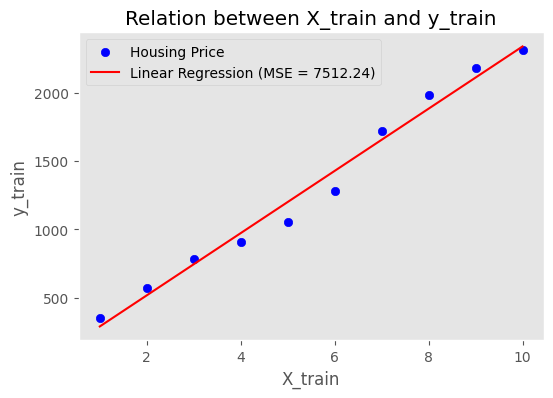

w: 227.70
b: 60.67
Mean Squared Error (MSE): 7512.24


In [53]:
mse = mean_squared_error(y_train, y_pred) # คำนวณ mse ด้วย Scikit-Learn Library

plt.figure(figsize=(6, 4)) # กำหนดขนาดของกราฟ
# พล็อตกราฟแบบจุด, โดยใช้ค่า X_train และ y_train, ให้สีจุดเป็นสีฟ้า, ชื่อจุดชื่อ Housing Price
plt.scatter(X_train, y_train, color='blue',label='Housing Price')
plt.plot(X_train, y_pred, color='red', label=f'Linear Regression (MSE = {mse:.2f})')  # พล็อตสมการ linear Regression พร้อม ค่า MSE
plt.title('Relation between X_train and y_train')  # ชื่อกราฟ
plt.xlabel('X_train')  # ชื่อแกน x
plt.ylabel('y_train')  # ชื่อแกน y
plt.legend()           # สั่งให้แสดงชื่อจุด
plt.grid()             # แสดงเส้น grid บนกราฟ
plt.show()             # แสดงกราฟ

# แสดงผลลัพธ์ของค่า w, b และ mse
print(f'w: {slope:.2f}')
print(f'b: {intercept:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

<h1 style="font-size: 18px;">3.3 การทำนายข้อมูลชุดใหม่ (Unseen Data)</h1>

In [54]:
X_test = np.array([20.0, 25.0, 30.0]) # สมมติเรามีข้อมูลขนาดของบ้านเข้ามาใหม่ โดยที่ไม่เคยมีในชุดข้อมูลก่อน
# ทำนายราคาของบ้านจากข้อมูล X_unseen ด้วยโมเดลที่เราเทรนมาแล้ว
y_pred = model.predict(X_test.reshape(-1, 1))
# แสดงผลค่าที่โมเดลทำนาย
y_pred

array([4614.60606061, 5753.09090909, 6891.57575758])

# Interactive Output สำหรับ Simple Linear Regression

In [55]:
from ipywidgets import interact

plt.style.use('ggplot')

X = np.linspace(0, 10, 100)
y_true = 3 * X + 5 + np.random.randn(100) * 2

def plot_linear_regression_and_mse(w=1.0, b=0.0):
    y_pred = w * X + b
    
    mse = np.mean((y_true - y_pred) ** 2)
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X, y_true, label='True Data', color='dodgerblue', alpha=0.7)
    plt.plot(X, y_pred, color='crimson', linewidth=2.5, label=f'Prediction: y = {w:.2f}x + {b:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Interactive Linear Regression', fontsize=16)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.subplot(1, 2, 2)
    plt.plot(X, (y_true - y_pred) ** 2, 'o', label='Squared Error', color='purple', alpha=0.7)
    plt.axhline(y=mse, color='green', linestyle='--', linewidth=2, label=f'MSE = {mse:.2f}')
    plt.xlabel('X')
    plt.ylabel('Squared Error')
    plt.title('MSE Cost Function', fontsize=16)
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

interact(plot_linear_regression_and_mse, w=(-10.0, 10.0, 0.1), b=(-10.0, 30.0, 0.1));

interactive(children=(FloatSlider(value=1.0, description='w', max=10.0, min=-10.0), FloatSlider(value=0.0, des…